In [75]:
import os
import tarfile
import urllib.request

RES_PATH = os.path.join("res_datasets","resourceing")

def fetch_resource_data(res_path=RES_PATH):
    if not os.path.isdir(res_path):
        os.makedirs(res_path)
##创建文件夹路径函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
fetch_resource_data() ##调用创建

##读取CSV文件
import pandas as pd

def load_res_data(res_path = RES_PATH,file_name="new_feature_1214.csv"):
    csv_path = os.path.join(RES_PATH,file_name)
    return pd.read_csv(csv_path) 





In [76]:
##数据处理
resource_origin_data = load_res_data()  #get origin csv data

#%matplotlib inline
#import matplotlib.pyplot as plt
#resource_origin_data.hist(bins=50, figsize=(20,15))
#plt.show() #data plot show

resource_origin_data_lut = resource_origin_data.dropna(subset = ["LUT"])
resource_origin_data_lut=resource_origin_data_lut.drop("FF",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("BUFG",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("IO",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleName",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("PARAMETERVALUE",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleInsts",axis=1)

In [77]:
#数据信息
resource_origin_data_lut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 229
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ARITLSHIFT                 212 non-null    int64  
 1   ARITLSHIFT_PORT_NUM        212 non-null    int64  
 2   ARITLSHIFT_PORT_WIDTH      212 non-null    int64  
 3   ARITLSHIFT_VALUE           212 non-null    int64  
 4   ARITRSHIFT                 212 non-null    int64  
 5   ARITRSHIFT_PORT_NUM        212 non-null    int64  
 6   ARITRSHIFT_PORT_WIDTH      212 non-null    int64  
 7   ARITRSHIFT_VALUE           212 non-null    int64  
 8   AlwaysConstructs           212 non-null    int64  
 9   AssignLHSPortNum           212 non-null    int64  
 10  AssignLHSWidth             212 non-null    int64  
 11  AssignRHSPortNum           212 non-null    int64  
 12  AssignRHSWidth             212 non-null    int64  
 13  AssignStmts                212 non-null    int64  

In [78]:
resource_origin_data_lut.describe()

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH,LUT
count,212.0,212.0,212.0,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.0,0.0,0.0,0.0,0.113208,0.070755,0.674528,0.386792,2.287736,2.924528,...,0.523585,3.886792,0.495283,0.561321,3.783019,124.339623,0.250000,2.844340,13.976415,32.731132
std,0.0,0.0,0.0,0.0,0.758156,0.524014,4.576129,2.801728,3.237406,10.205192,...,2.526525,8.233927,4.434353,4.076405,5.397041,705.919378,2.236863,8.446055,52.403144,85.157887
min,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.750000,0.000000,0.000000,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,8.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,4.000000,0.000000,0.000000,4.000000,31.000000,0.000000,1.250000,2.000000,35.250000
max,0.0,0.0,0.0,0.0,8.000000,7.000000,56.000000,28.000000,24.000000,127.000000,...,31.000000,55.000000,62.000000,56.000000,32.000000,8202.000000,32.000000,65.000000,575.000000,948.000000


In [79]:
#相关性分析
corr_matrix=resource_origin_data_lut.corr()
corr_matrix["LUT"].sort_values(ascending=False)

LUT                          1.000000
CONDITIONALELSE              0.431417
NonBlockLeftWidth            0.417203
PLUS                         0.399622
NonBlockingAssign            0.393835
CONDITIONALTHEN              0.392870
CONDITIONALIF                0.392870
NonBlockingLeftPortNum       0.387136
REG                          0.318705
AlwaysConstructs             0.276555
CONDITIONALIFWIDTH           0.266208
REDAND                       0.251582
MIN                          0.232235
CASEITEMNUM                  0.232026
NonBlockRightWidth           0.229791
CASECONDITIONNUM             0.214073
OUTPUTWIDTH                  0.211457
AssignLHSWidth               0.201654
INPUTWIDTH                   0.192558
CASECONDITIONWIDTH           0.189411
AssignRHSWidth               0.180115
NonBlockingRightPortNum      0.179107
BlockAssign_Left_Width       0.143185
ARITRSHIFT_PORT_NUM          0.139558
WIREWIDTH                    0.136321
BLOCKINGASSIGN               0.133238
INPUT       

In [80]:
#特征优化
resource_lut = resource_origin_data_lut["LUT"].copy() #label data
resource_lut_data = resource_origin_data_lut.drop("LUT",axis=1) #feature data
resource_label = list(resource_lut_data) #labal list


In [106]:
#数据分割
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#训练集、测试集、验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(resource_lut_data, resource_lut, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [107]:
X_valid_backup = X_valid

In [108]:
#数据标准化
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train_full = scaler.transform(X_train_full)
X_data_full = scaler.transform(resource_lut_data)

In [84]:
#深度学习

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [85]:
X_train.shape

(126, 59)

In [86]:
keras.backend.clear_session()
#input_ = keras.layers.Input(shape=X_train.shape[1:])
#hidden1 = keras.layers.Dense(59, activation="relu")(input_)
#hidden2 = keras.layers.Dense(150, activation="relu")(hidden1)
#concat = keras.layers.concatenate([input_, hidden2])
#output = keras.layers.Dense(1)(concat)
#model = keras.models.Model(inputs=[input_], outputs=[output])
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=200)

In [87]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(59, activation="relu"),
    keras.layers.Dense(1)
])

In [88]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train_full, y_train_full, epochs=10000, validation_data=(X_valid, y_valid),callbacks=early_stopping_cb)

Epoch 1/10000
6/6 [==============================] - 0s 15ms/step - loss: 7902.7266 - val_loss: 872.7588
Epoch 2/10000
6/6 [==============================] - 0s 4ms/step - loss: 6781.4888 - val_loss: 550.0302
Epoch 3/10000
6/6 [==============================] - 0s 4ms/step - loss: 5841.3911 - val_loss: 349.8391
Epoch 4/10000
6/6 [==============================] - 0s 4ms/step - loss: 5295.2739 - val_loss: 373.9924
Epoch 5/10000
6/6 [==============================] - 0s 4ms/step - loss: 5120.5039 - val_loss: 318.6028
Epoch 6/10000
6/6 [==============================] - 0s 4ms/step - loss: 4761.1382 - val_loss: 361.5326
Epoch 7/10000
6/6 [==============================] - 0s 4ms/step - loss: 4789.3970 - val_loss: 344.7203
Epoch 8/10000
6/6 [==============================] - 0s 4ms/step - loss: 4511.7358 - val_loss: 272.4897
Epoch 9/10000
6/6 [==============================] - 0s 5ms/step - loss: 4566.9072 - val_loss: 243.1097
Epoch 10/10000
6/6 [==============================] - 0s 4ms/st

Epoch 79/10000
6/6 [==============================] - 0s 4ms/step - loss: 2228.6316 - val_loss: 220.8329
Epoch 80/10000
6/6 [==============================] - 0s 4ms/step - loss: 1614.2640 - val_loss: 240.9757
Epoch 81/10000
6/6 [==============================] - 0s 4ms/step - loss: 1890.7802 - val_loss: 205.1871
Epoch 82/10000
6/6 [==============================] - 0s 4ms/step - loss: 1740.4199 - val_loss: 534.9204
Epoch 83/10000
6/6 [==============================] - 0s 4ms/step - loss: 1371.5966 - val_loss: 307.0125
Epoch 84/10000
6/6 [==============================] - 0s 4ms/step - loss: 1412.4924 - val_loss: 233.8252
Epoch 85/10000
6/6 [==============================] - 0s 4ms/step - loss: 1177.3101 - val_loss: 573.3600
Epoch 86/10000
6/6 [==============================] - 0s 4ms/step - loss: 1115.5105 - val_loss: 179.5225
Epoch 87/10000
6/6 [==============================] - 0s 4ms/step - loss: 1029.8827 - val_loss: 1715.1495
Epoch 88/10000
6/6 [==============================] - 

6/6 [==============================] - 0s 4ms/step - loss: 48.3499 - val_loss: 63.7216
Epoch 158/10000
6/6 [==============================] - 0s 4ms/step - loss: 57.8536 - val_loss: 28.1967
Epoch 159/10000
6/6 [==============================] - 0s 4ms/step - loss: 50.4876 - val_loss: 95.2681
Epoch 160/10000
6/6 [==============================] - 0s 4ms/step - loss: 53.0849 - val_loss: 214.3655
Epoch 161/10000
6/6 [==============================] - 0s 4ms/step - loss: 78.8393 - val_loss: 30.1454
Epoch 162/10000
6/6 [==============================] - 0s 4ms/step - loss: 54.1575 - val_loss: 29.4229
Epoch 163/10000
6/6 [==============================] - 0s 4ms/step - loss: 44.5737 - val_loss: 22.6294
Epoch 164/10000
6/6 [==============================] - 0s 4ms/step - loss: 43.3874 - val_loss: 37.2285
Epoch 165/10000
6/6 [==============================] - 0s 4ms/step - loss: 43.4400 - val_loss: 36.4495
Epoch 166/10000
6/6 [==============================] - 0s 4ms/step - loss: 46.9316 - val

6/6 [==============================] - 0s 4ms/step - loss: 27.8909 - val_loss: 13.7794
Epoch 237/10000
6/6 [==============================] - 0s 4ms/step - loss: 26.1418 - val_loss: 13.1086
Epoch 238/10000
6/6 [==============================] - 0s 4ms/step - loss: 27.9322 - val_loss: 16.4537
Epoch 239/10000
6/6 [==============================] - 0s 4ms/step - loss: 27.3029 - val_loss: 60.4839
Epoch 240/10000
6/6 [==============================] - 0s 4ms/step - loss: 31.1800 - val_loss: 14.4717
Epoch 241/10000
6/6 [==============================] - 0s 4ms/step - loss: 25.5259 - val_loss: 16.4109
Epoch 242/10000
6/6 [==============================] - 0s 4ms/step - loss: 25.7564 - val_loss: 26.5555
Epoch 243/10000
6/6 [==============================] - 0s 4ms/step - loss: 29.0853 - val_loss: 23.8844
Epoch 244/10000
6/6 [==============================] - 0s 4ms/step - loss: 28.9451 - val_loss: 13.3209
Epoch 245/10000
6/6 [==============================] - 0s 4ms/step - loss: 23.2689 - val_

6/6 [==============================] - 0s 4ms/step - loss: 23.6845 - val_loss: 18.1400
Epoch 316/10000
6/6 [==============================] - 0s 4ms/step - loss: 21.3202 - val_loss: 14.2734
Epoch 317/10000
6/6 [==============================] - 0s 4ms/step - loss: 24.3531 - val_loss: 15.5612
Epoch 318/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.7535 - val_loss: 10.7237
Epoch 319/10000
6/6 [==============================] - 0s 4ms/step - loss: 17.9016 - val_loss: 22.1164
Epoch 320/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.8254 - val_loss: 8.5769
Epoch 321/10000
6/6 [==============================] - 0s 4ms/step - loss: 18.2310 - val_loss: 13.5836
Epoch 322/10000
6/6 [==============================] - 0s 5ms/step - loss: 18.7844 - val_loss: 12.0048
Epoch 323/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.0635 - val_loss: 20.8298
Epoch 324/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.9828 - val_l

6/6 [==============================] - 0s 4ms/step - loss: 34.3213 - val_loss: 15.3929
Epoch 395/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.3643 - val_loss: 9.3461
Epoch 396/10000
6/6 [==============================] - 0s 4ms/step - loss: 15.3749 - val_loss: 6.0563
Epoch 397/10000
6/6 [==============================] - 0s 4ms/step - loss: 14.7303 - val_loss: 15.7630
Epoch 398/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.4696 - val_loss: 4.7190
Epoch 399/10000
6/6 [==============================] - 0s 4ms/step - loss: 15.7174 - val_loss: 7.0302
Epoch 400/10000
6/6 [==============================] - 0s 4ms/step - loss: 13.4722 - val_loss: 33.9681
Epoch 401/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.2611 - val_loss: 14.6514
Epoch 402/10000
6/6 [==============================] - 0s 4ms/step - loss: 18.4443 - val_loss: 7.3088
Epoch 403/10000
6/6 [==============================] - 0s 4ms/step - loss: 14.2874 - val_loss:

Epoch 474/10000
6/6 [==============================] - 0s 4ms/step - loss: 11.4477 - val_loss: 10.2174
Epoch 475/10000
6/6 [==============================] - 0s 4ms/step - loss: 11.3425 - val_loss: 4.8127
Epoch 476/10000
6/6 [==============================] - 0s 5ms/step - loss: 10.3212 - val_loss: 4.7620
Epoch 477/10000
6/6 [==============================] - 0s 4ms/step - loss: 9.9513 - val_loss: 13.8297
Epoch 478/10000
6/6 [==============================] - 0s 4ms/step - loss: 13.1535 - val_loss: 3.5958
Epoch 479/10000
6/6 [==============================] - 0s 4ms/step - loss: 8.9966 - val_loss: 5.5806
Epoch 480/10000
6/6 [==============================] - 0s 4ms/step - loss: 9.6611 - val_loss: 13.8304
Epoch 481/10000
6/6 [==============================] - 0s 4ms/step - loss: 24.7482 - val_loss: 4.1741
Epoch 482/10000
6/6 [==============================] - 0s 4ms/step - loss: 12.5694 - val_loss: 6.4117
Epoch 483/10000
6/6 [==============================] - 0s 4ms/step - loss: 15.5660

6/6 [==============================] - 0s 4ms/step - loss: 12.2232 - val_loss: 6.9450
Epoch 555/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.8091 - val_loss: 4.2778
Epoch 556/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.1373 - val_loss: 3.1973
Epoch 557/10000
6/6 [==============================] - 0s 4ms/step - loss: 8.2170 - val_loss: 11.0846
Epoch 558/10000
6/6 [==============================] - 0s 4ms/step - loss: 8.9093 - val_loss: 3.3805
Epoch 559/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.0173 - val_loss: 3.2594
Epoch 560/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.5123 - val_loss: 27.4771
Epoch 561/10000
6/6 [==============================] - 0s 4ms/step - loss: 15.3265 - val_loss: 9.9251
Epoch 562/10000
6/6 [==============================] - 0s 4ms/step - loss: 9.4117 - val_loss: 2.6347
Epoch 563/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.1820 - val_loss: 23.1058
E

Epoch 634/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.0663 - val_loss: 7.4617
Epoch 635/10000
6/6 [==============================] - 0s 4ms/step - loss: 6.3809 - val_loss: 2.9588
Epoch 636/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.7307 - val_loss: 4.1816
Epoch 637/10000
6/6 [==============================] - 0s 4ms/step - loss: 10.5537 - val_loss: 72.5275
Epoch 638/10000
6/6 [==============================] - 0s 4ms/step - loss: 16.4535 - val_loss: 2.1171
Epoch 639/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.1534 - val_loss: 2.5860
Epoch 640/10000
6/6 [==============================] - 0s 4ms/step - loss: 6.8466 - val_loss: 11.6141
Epoch 641/10000
6/6 [==============================] - 0s 4ms/step - loss: 16.4461 - val_loss: 2.5697
Epoch 642/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.4919 - val_loss: 2.3333
Epoch 643/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.6800 - va

Epoch 715/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.4652 - val_loss: 2.1239
Epoch 716/10000
6/6 [==============================] - 0s 4ms/step - loss: 6.1995 - val_loss: 6.1380
Epoch 717/10000
6/6 [==============================] - 0s 4ms/step - loss: 9.1419 - val_loss: 3.9058
Epoch 718/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.0552 - val_loss: 1.5076
Epoch 719/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.8762 - val_loss: 1.7542
Epoch 720/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.7583 - val_loss: 1.6281
Epoch 721/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.6973 - val_loss: 8.4942
Epoch 722/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.7870 - val_loss: 1.8984
Epoch 723/10000
6/6 [==============================] - 0s 4ms/step - loss: 6.4249 - val_loss: 1.8299
Epoch 724/10000
6/6 [==============================] - 0s 4ms/step - loss: 6.5967 - val_los

Epoch 796/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.4536 - val_loss: 1.7078
Epoch 797/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.0703 - val_loss: 2.0557
Epoch 798/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.9879 - val_loss: 2.9883
Epoch 799/10000
6/6 [==============================] - 0s 4ms/step - loss: 6.1903 - val_loss: 3.2175
Epoch 800/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.0556 - val_loss: 2.2710
Epoch 801/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.9381 - val_loss: 1.2793
Epoch 802/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.3075 - val_loss: 1.9392
Epoch 803/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.9212 - val_loss: 1.3975
Epoch 804/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.4131 - val_loss: 1.7892
Epoch 805/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.7461 - val_los

6/6 [==============================] - 0s 4ms/step - loss: 4.4294 - val_loss: 4.0691
Epoch 878/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.9539 - val_loss: 26.7830
Epoch 879/10000
6/6 [==============================] - 0s 4ms/step - loss: 11.3193 - val_loss: 2.9108
Epoch 880/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.1728 - val_loss: 2.5524
Epoch 881/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.7696 - val_loss: 1.1956
Epoch 882/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.5865 - val_loss: 1.7294
Epoch 883/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.7154 - val_loss: 1.1255
Epoch 884/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.1120 - val_loss: 1.7448
Epoch 885/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.6577 - val_loss: 4.3785
Epoch 886/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.0153 - val_loss: 2.2628
Epoc

6/6 [==============================] - 0s 4ms/step - loss: 9.8579 - val_loss: 8.3696
Epoch 959/10000
6/6 [==============================] - 0s 4ms/step - loss: 9.1027 - val_loss: 3.0391
Epoch 960/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.1328 - val_loss: 2.8520
Epoch 961/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.9242 - val_loss: 2.1811
Epoch 962/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.5591 - val_loss: 1.7418
Epoch 963/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.3210 - val_loss: 1.6879
Epoch 964/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.3048 - val_loss: 1.1841
Epoch 965/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.8114 - val_loss: 3.4193
Epoch 966/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.4567 - val_loss: 36.6068
Epoch 967/10000
6/6 [==============================] - 0s 4ms/step - loss: 19.0158 - val_loss: 23.1374
Epo

Epoch 1039/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.2867 - val_loss: 4.8683
Epoch 1040/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.0669 - val_loss: 9.0912
Epoch 1041/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.5738 - val_loss: 0.9914
Epoch 1042/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.9935 - val_loss: 0.9960
Epoch 1043/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.7256 - val_loss: 1.5387
Epoch 1044/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.0834 - val_loss: 0.8793
Epoch 1045/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.3491 - val_loss: 1.4228
Epoch 1046/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.4175 - val_loss: 1.6288
Epoch 1047/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.8638 - val_loss: 5.3237
Epoch 1048/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.9374

6/6 [==============================] - 0s 4ms/step - loss: 2.4977 - val_loss: 1.1895
Epoch 1120/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.6691 - val_loss: 5.6658
Epoch 1121/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.2848 - val_loss: 12.6785
Epoch 1122/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.2799 - val_loss: 4.6979
Epoch 1123/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.3426 - val_loss: 5.1563
Epoch 1124/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.3324 - val_loss: 0.8794
Epoch 1125/10000
6/6 [==============================] - 0s 5ms/step - loss: 2.7559 - val_loss: 2.3080
Epoch 1126/10000
6/6 [==============================] - 0s 5ms/step - loss: 2.4985 - val_loss: 0.9142
Epoch 1127/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.5380 - val_loss: 8.0561
Epoch 1128/10000
6/6 [==============================] - 0s 4ms/step - loss: 8.0761 - val_loss: 3.7

Epoch 1199/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2757 - val_loss: 0.8605
Epoch 1200/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.3445 - val_loss: 1.7726
Epoch 1201/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.7749 - val_loss: 3.3289
Epoch 1202/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.7063 - val_loss: 1.7527
Epoch 1203/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.8240 - val_loss: 0.9455
Epoch 1204/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.6327 - val_loss: 5.5780
Epoch 1205/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.8221 - val_loss: 4.2593
Epoch 1206/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.9764 - val_loss: 1.2326
Epoch 1207/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.5218 - val_loss: 4.5501
Epoch 1208/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.2737

Epoch 1279/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.0290 - val_loss: 0.8208
Epoch 1280/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.5056 - val_loss: 4.4459
Epoch 1281/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.6467 - val_loss: 2.5372
Epoch 1282/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.6237 - val_loss: 2.6263
Epoch 1283/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.7844 - val_loss: 1.1049
Epoch 1284/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.2245 - val_loss: 2.2150
Epoch 1285/10000
6/6 [==============================] - 0s 4ms/step - loss: 5.8092 - val_loss: 1.7933
Epoch 1286/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.0020 - val_loss: 3.5514
Epoch 1287/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.8680 - val_loss: 0.9941
Epoch 1288/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.5334

6/6 [==============================] - 0s 4ms/step - loss: 2.6495 - val_loss: 7.7473
Epoch 1360/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.1654 - val_loss: 2.0978
Epoch 1361/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2373 - val_loss: 2.9400
Epoch 1362/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.2201 - val_loss: 2.4152
Epoch 1363/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.7216 - val_loss: 2.9419
Epoch 1364/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.5967 - val_loss: 0.8018
Epoch 1365/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.1920 - val_loss: 1.1903
Epoch 1366/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2834 - val_loss: 0.6176
Epoch 1367/10000
6/6 [==============================] - 0s 4ms/step - loss: 4.5394 - val_loss: 0.7022
Epoch 1368/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.1395 - val_loss: 3.50

6/6 [==============================] - 0s 4ms/step - loss: 2.2334 - val_loss: 1.6290
Epoch 1440/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.8414 - val_loss: 7.7061
Epoch 1441/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.2924 - val_loss: 1.0008
Epoch 1442/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.6395 - val_loss: 5.8193
Epoch 1443/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2081 - val_loss: 1.8927
Epoch 1444/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.4927 - val_loss: 3.8331
Epoch 1445/10000
6/6 [==============================] - 0s 5ms/step - loss: 2.2988 - val_loss: 1.5552
Epoch 1446/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.8267 - val_loss: 0.5917
Epoch 1447/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.0634 - val_loss: 1.1303
Epoch 1448/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.6571 - val_loss: 1.85

6/6 [==============================] - 0s 4ms/step - loss: 2.7365 - val_loss: 1.0459
Epoch 1520/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.0202 - val_loss: 0.7207
Epoch 1521/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2902 - val_loss: 1.1745
Epoch 1522/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.8516 - val_loss: 0.8542
Epoch 1523/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.8483 - val_loss: 0.7365
Epoch 1524/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.3317 - val_loss: 0.9758
Epoch 1525/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.9202 - val_loss: 3.4673
Epoch 1526/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.2786 - val_loss: 2.9584
Epoch 1527/10000
6/6 [==============================] - 0s 3ms/step - loss: 3.8026 - val_loss: 6.6207
Epoch 1528/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.8803 - val_loss: 1.64

6/6 [==============================] - 0s 4ms/step - loss: 1.5322 - val_loss: 0.5807
Epoch 1600/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5092 - val_loss: 1.8279
Epoch 1601/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.1281 - val_loss: 0.7613
Epoch 1602/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.1464 - val_loss: 2.1077
Epoch 1603/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.6439 - val_loss: 4.7541
Epoch 1604/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.2912 - val_loss: 3.2220
Epoch 1605/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.8718 - val_loss: 0.5269
Epoch 1606/10000
6/6 [==============================] - 0s 4ms/step - loss: 1.5916 - val_loss: 6.5063
Epoch 1607/10000
6/6 [==============================] - 0s 5ms/step - loss: 2.7353 - val_loss: 2.5281
Epoch 1608/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.3735 - val_loss: 1.90

Epoch 1679/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.4167 - val_loss: 1.2967
Epoch 1680/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.0790 - val_loss: 3.0391
Epoch 1681/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.1704 - val_loss: 3.7841
Epoch 1682/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.4297 - val_loss: 1.1422
Epoch 1683/10000
6/6 [==============================] - 0s 4ms/step - loss: 7.4628 - val_loss: 11.8401
Epoch 1684/10000
6/6 [==============================] - 0s 4ms/step - loss: 8.3023 - val_loss: 4.7816
Epoch 1685/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.4562 - val_loss: 3.1184
Epoch 1686/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.8160 - val_loss: 4.4652
Epoch 1687/10000
6/6 [==============================] - 0s 4ms/step - loss: 3.0475 - val_loss: 3.0181
Epoch 1688/10000
6/6 [==============================] - 0s 4ms/step - loss: 2.068

In [109]:
model.predict(X_valid)

array([[-4.26856804e+00],
       [ 6.14976959e+01],
       [ 7.14575577e+01],
       [ 1.98475468e+00],
       [ 5.87914085e+00],
       [ 5.88872147e+00],
       [ 9.87386475e+01],
       [ 3.38187134e+02],
       [ 1.07103643e+01],
       [ 4.65599022e+01],
       [ 6.47305756e+01],
       [ 1.73598111e+00],
       [ 5.63512039e+01],
       [ 1.87781124e+01],
       [ 1.02937767e+02],
       [ 5.95165443e+01],
       [-2.63833046e+00],
       [ 9.45659332e+01],
       [ 7.27102585e+01],
       [ 4.62103844e+00],
       [ 2.21077612e+03],
       [-1.76898277e+00],
       [ 1.15266266e+02],
       [ 1.36818256e+01],
       [-1.79439914e+00],
       [ 1.24464516e+02],
       [ 3.08278275e+01],
       [ 6.07139778e+00],
       [ 3.37609787e+01],
       [ 2.21376076e+01],
       [ 1.62430725e+02],
       [ 2.72856026e+01],
       [ 1.37348976e+01],
       [ 1.87781124e+01],
       [ 1.26831169e+02],
       [ 1.32390499e+01],
       [ 1.33106308e+01],
       [ 4.01074257e+01],
       [ 1.9

In [90]:
X_valid_backup

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONIF,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH
1,0,0,0,0,0,0,0,0,3,3,...,3,3,5,0,0,6,55,0,5,50
74,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,2,2,64,0,0,0
195,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,4,26,0,0,0
64,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
114,0,0,0,0,0,0,0,0,3,0,...,0,0,6,0,0,2,26,0,0,0
106,0,0,0,0,0,0,0,0,1,1,...,1,1,0,0,0,3,3,0,0,0
8,0,0,0,0,7,0,0,28,1,7,...,0,0,0,0,0,8,92,0,7,90
209,0,0,0,0,0,0,0,0,17,30,...,5,5,35,0,0,18,63,1,47,194


In [110]:
y_valid

89       2.0
209     54.0
21      32.0
87       1.0
145      3.0
28       0.0
203    127.0
72     276.0
117      1.0
11      47.0
102     69.0
67       1.0
126     72.0
48       2.0
178     73.0
131    104.0
111      4.0
149     22.0
75      61.0
181      4.0
96     200.0
143      1.0
10      91.0
61       4.0
42       1.0
68     102.0
214     42.0
130      3.0
44       8.0
190     34.0
107     90.0
60      20.0
198      2.0
47       2.0
2      100.0
119      4.0
182     20.0
33      22.0
103      1.0
115      0.0
219     11.0
62       4.0
138      1.0
Name: LUT, dtype: float64

In [92]:
y_train_full

140      1.0
120     68.0
80      14.0
95       0.0
109    123.0
       ...  
118      0.0
17     170.0
104      1.0
195      0.0
114     44.0
Name: LUT, Length: 169, dtype: float64

4/4 [==============================] - 0s 1ms/step - loss: 0.7161


5/5 [==============================] - 0s 748us/step - loss: 0.7557


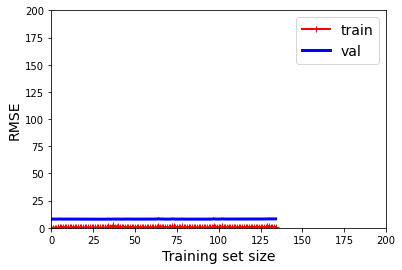

In [99]:
plot_learning_curves(model, X_train_full, y_train_full)
plt.axis([0, 200, 0, 200])                         # not shown in the book
plt.show()    

In [111]:
predict = model.predict(X_valid)
predict

array([[-4.26856804e+00],
       [ 6.14976959e+01],
       [ 7.14575577e+01],
       [ 1.98475468e+00],
       [ 5.87914085e+00],
       [ 5.88872147e+00],
       [ 9.87386475e+01],
       [ 3.38187134e+02],
       [ 1.07103643e+01],
       [ 4.65599022e+01],
       [ 6.47305756e+01],
       [ 1.73598111e+00],
       [ 5.63512039e+01],
       [ 1.87781124e+01],
       [ 1.02937767e+02],
       [ 5.95165443e+01],
       [-2.63833046e+00],
       [ 9.45659332e+01],
       [ 7.27102585e+01],
       [ 4.62103844e+00],
       [ 2.21077612e+03],
       [-1.76898277e+00],
       [ 1.15266266e+02],
       [ 1.36818256e+01],
       [-1.79439914e+00],
       [ 1.24464516e+02],
       [ 3.08278275e+01],
       [ 6.07139778e+00],
       [ 3.37609787e+01],
       [ 2.21376076e+01],
       [ 1.62430725e+02],
       [ 2.72856026e+01],
       [ 1.37348976e+01],
       [ 1.87781124e+01],
       [ 1.26831169e+02],
       [ 1.32390499e+01],
       [ 1.33106308e+01],
       [ 4.01074257e+01],
       [ 1.9

In [112]:
y_valid

89       2.0
209     54.0
21      32.0
87       1.0
145      3.0
28       0.0
203    127.0
72     276.0
117      1.0
11      47.0
102     69.0
67       1.0
126     72.0
48       2.0
178     73.0
131    104.0
111      4.0
149     22.0
75      61.0
181      4.0
96     200.0
143      1.0
10      91.0
61       4.0
42       1.0
68     102.0
214     42.0
130      3.0
44       8.0
190     34.0
107     90.0
60      20.0
198      2.0
47       2.0
2      100.0
119      4.0
182     20.0
33      22.0
103      1.0
115      0.0
219     11.0
62       4.0
138      1.0
Name: LUT, dtype: float64

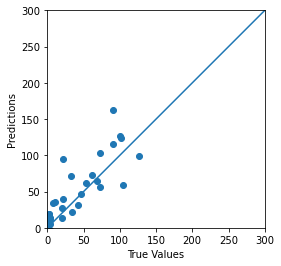

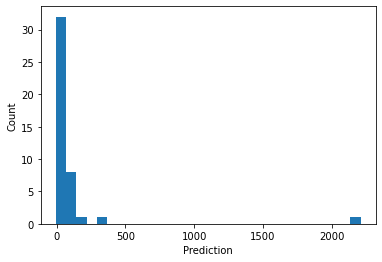

In [116]:
plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(y_valid,predict)
plt.xlabel('True Values')
plt.ylabel('Predictions')
Lims=[0,300]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)
    
plt.figure(2)
plt.clf()
plt.hist(predict,bins=30)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.grid(False)
